<a href="https://colab.research.google.com/github/diaszakir/Dias_CompMath1/blob/main/Assignment1_DiasZakir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Graphical method and absolute error.
Problem:
1. Plot the graph of the function f(x)=x^3−2x^2−5 in the range x∈[1,4].
2. Using the graph, find the approximate value of the root.
3. Calculate the value of f(x), where x is the found approximate value of the root.
4. Find the absolute error between the approximate value of the root and the true value (using any other
method for the exact solution).

Required:
1. Plot a graph.
2. Give a detailed calculation of the absolute error.
3. Explain why the graphical root search method is only approximate.


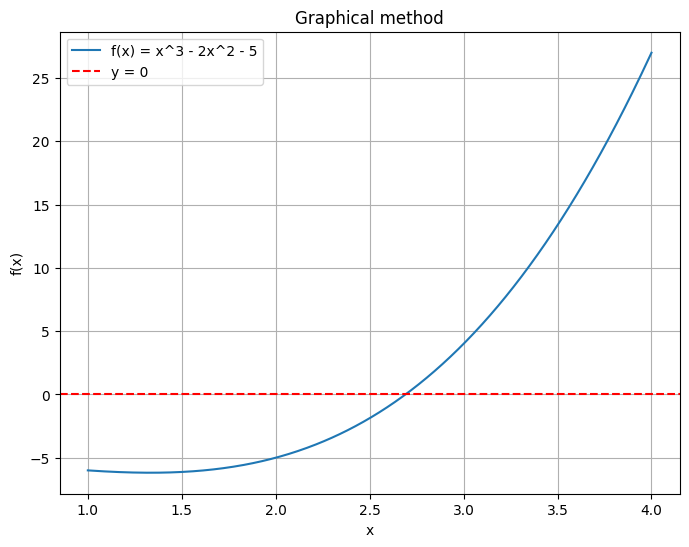

Approximate Root (Graphical Method): 2.5
f(Approximate Root): -1.875
True Root (Bisection Method): 2.690647
Absolute Error: 1.906474e-01


In [53]:
import numpy as np
import matplotlib.pyplot as plt

def bisection_method(f, a, b, tol):
    # We check that the root really lies in the interval [a, b]
    if f(a) * f(b) >= 0:
        print("Invalid initial values. f(a) and f(b) must be of different signs.")
        return None

    # Finding midpoint
    midpoint = (a + b) / 2
    while abs(f(midpoint)) > tol:
        if f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        midpoint = (a + b) / 2

    return midpoint

# Definition of a function
def f(x):
  return x**3-2*x**2-5

# Plotting a graph
x = np.linspace(1, 4, 500)  # Range of x values
y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = x^3 - 2x^2 - 5")
plt.axhline(0, color='red', linestyle='--', label="y = 0")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graphical method")
plt.legend()
plt.grid()
plt.show()

# Finding approximate root from graph
approximate_root = 2.5
f_approx = f(approximate_root)

# Using bisection method
true_root = bisection_method(f, 2, 3, 1e-6)

absolute_error = abs(approximate_root - true_root)
# print(absolute_error)

print(f"Approximate Root (Graphical Method): {approximate_root}")
print(f"f(Approximate Root): {f_approx}")
print(f"True Root (Bisection Method): {true_root:.6f}")
print(f"Absolute Error: {absolute_error:e}")


Task 2: Comparison of root finding methods.
Problem:
1. Find the root of the equation f(x)=e^x−2x−3 in the interval [0,2] using the following methods:
- Bisection method.
- Secant method.
2. For each method, measure the number of iterations required to achieve an accuracy of 10^−6
.
3. Calculate the relative error for both methods with respect to the exact value of the root.

Required:
1. Write functions for each method.
2. Print the number of iterations and the exact value of the root.
3. Explain which method is more efficient and why.

In [58]:
import numpy as np
from scipy.optimize import fsolve

def bisection_method(f, a, b, tol):
    # We check that the root really lies in the interval [a, b]
    if f(a) * f(b) >= 0:
        print("Invalid initial values. f(a) and f(b) must be of different signs.")
        return None

    midpoint = (a + b) / 2
    iteration = 0
    while abs(f(midpoint)) > tol:
        if f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        midpoint = (a + b) / 2
        iteration += 1

    return midpoint, iteration


def secant_method(f, x0, x1, tol):
    # Iterative approximation of the root by the secant method
    iteration = 0
    while abs(f(x1)) > tol:
        x_temp = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))  # Formula
        x0, x1 = x1, x_temp  # Updating values
        iteration += 1
    return x1, iteration

exact_root = fsolve(lambda x: np.exp(x) - 2 * x - 3, 1)[0]

def f(x):
  return np.exp(x) - 2*x - 3

root1, iteration1 = bisection_method(f, 0, 2, 1e-6)
root2, iteration2 = secant_method(f, 0, 2, 1e-6)

bisection_relatative_error = abs(exact_root - root1) / abs(exact_root)
secant_relatative_error = abs(exact_root - root2) / abs(exact_root)


print(f"Exact root: {exact_root:.6f}")
print("Bisection method: ")
print(f"Approximate root: {root1:.6f}")
print(f"Iterations: {iteration1}")
print(f"Relative error: {bisection_relatative_error:.6e}")
print()
print("Secant_method: ")
print(f"Approximate root: {root2:.6f}")
print(f"Iterations: {iteration2}")
print(f"Relative_error: {secant_relatative_error:.6e}")

Exact root: 1.923939
Bisection method: 
Approximate root: 1.923939
Iterations: 18
Relative error: 4.547052e-10

Secant_method: 
Approximate root: 1.923939
Iterations: 5
Relative_error: 2.889443e-08


Task 3: Newton-Raphson Method and Error Estimation.
Problem:
1. Using the Newton-Raphson method, find the root of the equation f(x)=x^2−3x+2, starting with the initial
guess x0=2.5.
2. Calculate the absolute and relative errors at each iteration step.
3. Plot a convergence graph, where the iteration number is plotted on the x-axis and the absolute error is
plotted on the y-axis.

Required:
1. Provide a table of iterations with the current guess, absolute and relative errors.
2. Explain how the choice of the initial guess affects the convergence of the method.


Iteration Current Guess  Absolute Error Relative Error 
************************************************************
1         2.5            3.750000e-01      1.764706e-01
2         2.125          1.125000e-01      5.590062e-02
3         2.0125         1.234756e-02      6.173310e-03
4         2.00015        1.524158e-04      7.620790e-05

Newton-Raphson method: Root = 2.000000023230574, Iterations = 4

Errors at each iteration: 
Abs: [0.375, 0.11249999999999982, 0.012347560975609628, 0.0001524157938166404] 
Rel: [0.17647058823529413, 0.05590062111801233, 0.006173309961130947, 7.620789602314362e-05]


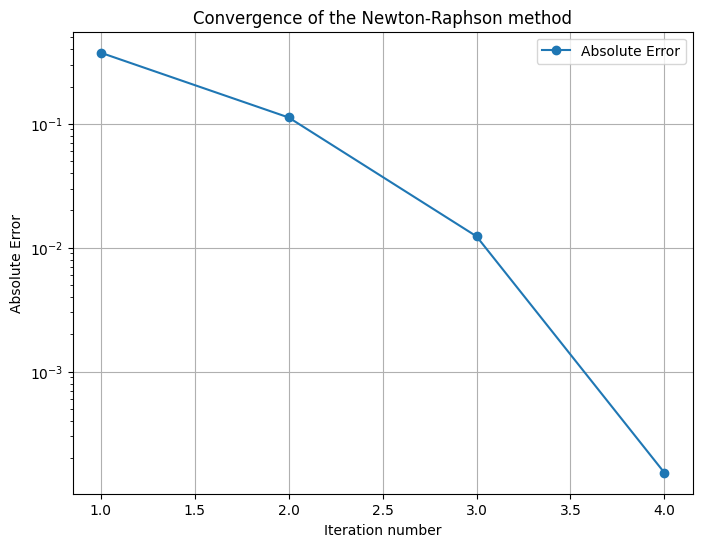

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def newton_raphson_method(f, df, x0, tol):
    absolute_errors = []
    relative_errors = []
    x = x0
    iteration = 0

    print(f"{'Iteration':<10}{'Current Guess':<15}{'Absolute Error':<15}{'Relative Error':<15}")
    print("*"*60)

    while abs(f(x)) > tol:
        # Calculate the next approximation
        x_new = x - f(x) / df(x)

        # Calculate absolute and relative errors
        absolute_error = abs(x_new - x)
        absolute_errors.append(absolute_error)
        relative_error = abs(absolute_error / x_new) if x_new != 0 else None
        relative_errors.append(relative_error)
        iteration += 1
        print(f"{iteration:<10}{x:<15.6}{absolute_error:<15.6e}{relative_error:15.6e}")

        # Update the guess for the next iteration
        x = x_new

    return x, iteration, absolute_errors, relative_errors

def f(x):
  return x**2 - 3 * x + 2


def df(x):
  return 2*x - 3

x0 = 2.5

root_newton, iter_newton, abs_errors, rel_errors = newton_raphson_method(f, df, x0, 1e-6)
print()
print(f"Newton-Raphson method: Root = {root_newton}, Iterations = {iter_newton}\n")
print("Errors at each iteration:", "\nAbs:", abs_errors,"\nRel:", rel_errors)

plt.figure(figsize=(8, 6))
plt.plot(range(1, iter_newton + 1), abs_errors, marker='o', label='Absolute Error')
plt.yscale('log')
plt.title("Convergence of the Newton-Raphson method")
plt.xlabel("Iteration number")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()

Task 4: Muller's Method and Complex Roots.
Problem:
1. Find one of the roots (including complex roots) for the function f(x)=x^3+x^2+x+1 using Muller's method,
starting with the initial approximations x0=-1, x1=0, x2=1.
2. Check the result by substituting the found root value into the function.
3. Calculate the absolute error between the calculated value of f(x) and 0.
Required:
1. Explain how Muller's method handles complex roots.
2. Provide an interpretation of the result.


In [ ]:
import cmath  # For working with complex numbers

def muller_method(f, x0, x1, x2, tol, max_iter=100):
    # Iterative root approximation by Muller's method
    for _ in range(max_iter):
        h0 = x1 - x0
        h1 = x2 - x1
        delta0 = (f(x1) - f(x0)) / h0
        delta1 = (f(x2) - f(x1)) / h1
        a = (delta1 - delta0) / (h1 + h0)
        b = a * h1 + delta1
        c = f(x2)

        discriminant = cmath.sqrt(b**2 - 4*a*c)
        if abs(b + discriminant) > abs(b - discriminant):
            denominator = b + discriminant
        else:
            denominator = b - discriminant

        x3 = x2 - (2 * c) / denominator  # Formula

        if abs(x3 - x2) < tol:  # Stop condition
            return x3
        x0, x1, x2 = x1, x2, x3

    print("The method did not converge within the specified number of iterations.")
    return None

# Definition of a function
def f(x):
    return x**3 - x**2 + x + 1

# Using method
root = muller_method(f, -1, 0, 1, 1e-6)
f_root = f(root)
absolute_error = abs(f_root - 0)
print(f"Root: {root} \nFunction Value at Root: {f_root},\nAbsolute Error: {absolute_error}")

Root: (0.7718445063460759-1.1151425080399628j) 
Function Value at Root: (-1.687538997430238e-13-4.729550084903167e-14j),
Absolute Error: 1.7525622122777635e-13


Task 5: Error estimation when using False position method.
Problem:
1. Find the root of the equation f(x)=x^2−2^x using the False position method.
2. Calculate the absolute and relative errors after each iteration.
3. Plot a graph of the absolute error as a function of the iteration number.

Required:
1. Explain why the false position method converges more slowly than the Newton-Raphson method.

Iteration 1: c = -0.3037974683544304, Absolute Error = 2.6962025316455698, Relative Error = 8.875
Iteration 2: c = -0.5055524065612824, Absolute Error = 0.20175493820685203, Relative Error = 0.39907818771780595
Iteration 3: c = -0.6256242229879854, Absolute Error = 0.12007181642670295, Relative Error = 0.1919232216636996
Iteration 4: c = -0.692378477576951, Absolute Error = 0.06675425458896567, Relative Error = 0.09641295440404066
Iteration 5: c = -0.7280751711451935, Absolute Error = 0.035696693568242455, Relative Error = 0.0490288571605799
Iteration 6: c = -0.7467650590890417, Absolute Error = 0.018689887943848182, Relative Error = 0.025027801872047235
Iteration 7: c = -0.7564421305471484, Absolute Error = 0.0096770714581067, Relative Error = 0.01279287742884852
Iteration 8: c = -0.7614236678828574, Absolute Error = 0.004981537335709052, Relative Error = 0.006542398858654135
Iteration 9: c = -0.7639803913114029, Absolute Error = 0.0025567234285455154, Relative Error = 0.0033465825270

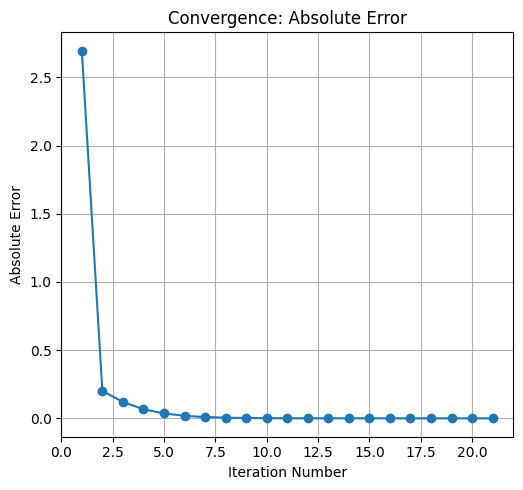

In [55]:
import matplotlib.pyplot as plt

def false_position_method(f, a, b, tol):
    # We check that the root really lies in the interval [a, b]
    if f(a) * f(b) >= 0:
        print("Invalid initial values. f(a) and f(b) must be of different signs.")
        return None, None, []

    c = a
    iteration = 0
    abs_errors = []
    rel_errors = []
    while True:
        c_new = b - f(b) * (b - a) / (f(b) - f(a))  # Formula
        abs_error = abs(c_new - c)
        abs_errors.append(abs_error)

        rel_error = abs_error / abs(c_new) if c_new != 0 else 0
        rel_errors.append(rel_error)

        print(f"Iteration {iteration + 1}: c = {c_new}, Absolute Error = {abs_error}, Relative Error = {rel_error}")

        # Check stopping condition
        if abs(f(c_new)) < tol or abs_error < tol:
            break

        if f(a) * f(c_new) < 0:
            b = c_new
        else:
            a = c_new

        c = c_new
        iteration += 1

    return c_new, iteration, abs_errors, rel_errors

# Definition of a function
def f(x):
    return x**2 - 2**x

# Using method
root, iter_count, abs_errors, rel_errors = false_position_method(f, -3, 0, 1e-6)

# Print the results
print(f"\nRoot: {root}, Iterations: {iter_count}")

# Plot the convergence graph for absolute error
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(abs_errors) + 1), abs_errors, marker='o', label="Absolute Error")
plt.xlabel("Iteration Number")
plt.ylabel("Absolute Error")
plt.title("Convergence: Absolute Error")
plt.grid()
plt.tight_layout()
plt.show()

Task 6: Iteration method and errors.
Problem:
1. Solve the equation f(x)=x^2−6x+5 using the iteration method. Transform the equation into the form
x=g(x).
2. Perform 10 iterations, starting with the initial value x0=0.5.
3. Find the absolute error at each iteration, comparing the result with the true root.

Required:
1. Explain how the choice of function g(x) affects convergence

Using g(x) = (x^2 + 5) / 6
Iteration Current Guess  Absolute Error 
****************************************
1         0.87500000     1.25000000e-01 
2         0.96093750     3.90625000e-02 
3         0.98723348     1.27665202e-02 
4         0.99577166     4.22834272e-03 
5         0.99859353     1.40646776e-03 
6         0.99953151     4.68492895e-04 
7         0.99984387     1.56127717e-04 
8         0.99994796     5.20385098e-05 
9         0.99998265     1.73457186e-05 
10        0.99999422     5.78185605e-06 


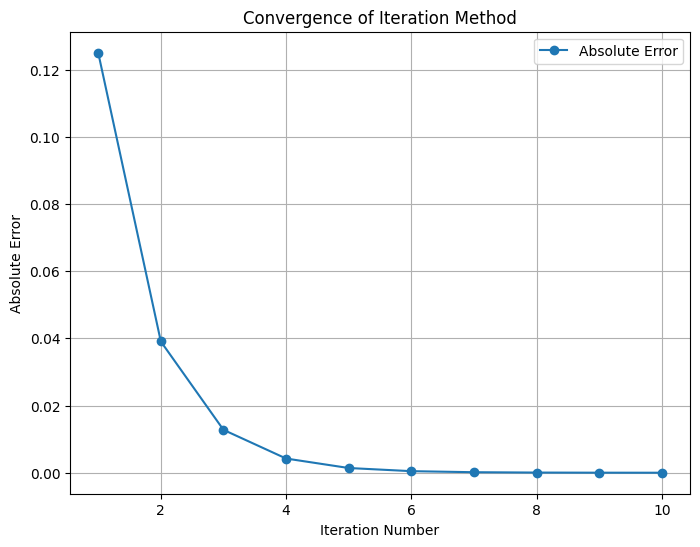

In [75]:
import matplotlib.pyplot as plt

def iteration_method(g, x0, true_root, iterations=10):
    x = x0
    abs_errors = []

    print(f"{'Iteration':<10}{'Current Guess':<15}{'Absolute Error':<15}")
    print("*" * 40)

    for i in range(1, iterations + 1):
        x_next = g(x)  # Fixed-point iteration formula
        absolute_error = abs(true_root - x_next)  # Compare with the true root
        abs_errors.append(absolute_error)

        print(f"{i:<10}{x_next:<15.8f}{absolute_error:<15.8e}")
        x = x_next  # Update the current value for the next iteration

    return abs_errors


# Transformations for g(x) based on f(x) = x^2 - 6x + 5
def g1(x):
    return (x**2 + 5) / 6  # Example transformation 1

# True roots of the equation f(x) = 0
true_root_1 = 1
true_root_2 = 5

# Starting point
x0 = 0.5

# Perform 10 iterations with g1(x)
print("Using g(x) = (x^2 + 5) / 6")
abs_errors = iteration_method(g1, x0, true_root_1)

# Plot absolute errors over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(abs_errors) + 1), abs_errors, marker='o', label='Absolute Error')
plt.title("Convergence of Iteration Method")
plt.xlabel("Iteration Number")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()
